In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os

# (WARNING!!!) DIRECT THE PATH TO "Data-Competition" folder in the Github
path = '/content/gdrive/My Drive/Data-Centric_Competition/Github_save/Data-Competition'
os.chdir(path)

## KNN separated by width & height

In [ ]:
!pwd

/content/gdrive/My Drive/Data-Centric_Competition/Github_save/Data-Competition


In [ ]:
import numpy as np
import glob
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import cv2

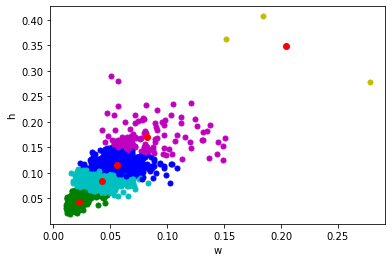

In [ ]:
w_h = []
# Get list width & height of all images
train_val = pd.read_csv('./dataset_origin/train_csv.csv', index_col=False)
for i in range(len(train_val)):
  w_h.append(list(train_val.iloc[i][-2:]))

kmeans = KMeans(n_clusters=5, random_state=0).fit(w_h)
# print(w_h)
# print(w_h[0][0])
cluster = kmeans.labels_
# print("Cluster: ", cluster)

# Center points of each cluster
scales = kmeans.cluster_centers_
# print('Scales: ', scales, '\n')

plt.xlabel('w')
plt.ylabel('h')

for i in range(len(cluster)):
    if cluster[i] == 0 :
        plt.plot(w_h[i][0],w_h[i][1], 'bo', markersize=5)
    if cluster[i] == 1 :
        plt.plot(w_h[i][0],w_h[i][1], 'go', markersize=5)
    if cluster[i] == 2 :
        plt.plot(w_h[i][0],w_h[i][1], 'co', markersize=5)
    if cluster[i] == 3 :
        plt.plot(w_h[i][0],w_h[i][1], 'mo', markersize=5)
    if cluster[i] == 4 :
        plt.plot(w_h[i][0],w_h[i][1], 'yo', markersize=5)


plt.plot(scales[:,0],scales[:,1],'ro',markersize=6)
plt.plot()
# plt.savefig('Clustering_5_BBX.png')
plt.show()


## KNN separated by vgg16 model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense,InputLayer


vgg16 = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),
    include_top=True, weights='imagenet'
)

input = tf.keras.Input(shape=(224,224,1) )
output = Conv2D(3,(3,3),padding='same')(input)
for layer in vgg16.layers[1:-2]: # don't get the final maxpooling layer and the input layer of vgg16.
    layer.trainable = False
    output= layer(output)
base_model = tf.keras.Model(inputs = input, outputs = output)
base_model.summary()


553476096/553467096 [==============================] - 10s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 3)       30        
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                           

Load all images to the variable X_Y 

In [ ]:
import glob
import cv2 

# DIRECT THIS PATH TO "train" FOLDER CONTAINED .JPG IMAGES
images_path = sorted(glob.glob("dataset_origin/images/train/*.jpg"))
X_Y = []

for i in range(len(images_path)):
    img = cv2.imread(images_path[i])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray,(224,224), interpolation = cv2.INTER_AREA)
    gray = resized.reshape((224, 224, 1))
    
    X_Y.append(gray)
X_Y = np.array(X_Y)
print(X_Y.shape)

(937, 224, 224, 1)


In [ ]:
import numpy as np
from tqdm import tqdm

# Features after predictions
features_map = np.zeros(shape=(X_Y.shape[0], 4096))

for i in tqdm(range(X_Y.shape[0])):
    feature_map = base_model.predict(np.reshape(X_Y[i], (1,224,224,1)))
    features_map[i] = feature_map
print("\n", features_map.shape)

100%|██████████| 937/937 [00:47<00:00, 19.73it/s]


 (937, 4096)


(937, 4096)


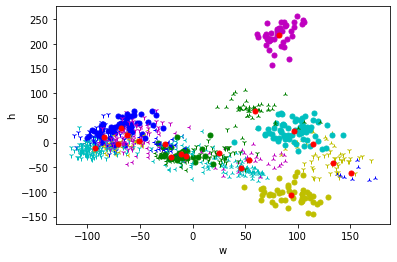

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

pca = PCA(n_components=10)
print(features_map.shape)

x = pca.fit_transform(features_map)

kmeans = KMeans(n_clusters=20, random_state=0).fit(x)

# "Cluster" here shows which group does the images belonged to? (0, 1, 2, 3 or 4)
cluster = kmeans.labels_
# print(cluster)

#you can see the labels with:
scales = kmeans.cluster_centers_
# print(scales)
plt.xlabel('w')
plt.ylabel('h')

for i in range(len(cluster)):
    if cluster[i] == 0 :
        plt.plot(x[i][0], x[i][1], 'bo', markersize=5)
    if cluster[i] == 1 :
        plt.plot(x[i][0], x[i][1], 'go', markersize=5)
    if cluster[i] == 2 :
        plt.plot(x[i][0], x[i][1], 'co', markersize=5)
    if cluster[i] == 3 :
        plt.plot(x[i][0], x[i][1], 'mo', markersize=5)
    if cluster[i] == 4 :
        plt.plot(x[i][0], x[i][1], 'yo', markersize=5)
    if cluster[i] == 5 :
        plt.plot(x[i][0], x[i][1], 'b1', markersize=5)
    if cluster[i] == 6 :
        plt.plot(x[i][0], x[i][1], 'g1', markersize=5)
    if cluster[i] == 7 :
        plt.plot(x[i][0], x[i][1], 'c1', markersize=5)
    if cluster[i] == 8 :
        plt.plot(x[i][0], x[i][1], 'm1', markersize=5)
    if cluster[i] == 9 :
        plt.plot(x[i][0], x[i][1], 'y1', markersize=5)
    if cluster[i] == 10 :
        plt.plot(x[i][0], x[i][1], 'b2', markersize=5)
    if cluster[i] == 11 :
        plt.plot(x[i][0], x[i][1], 'g2', markersize=5)
    if cluster[i] == 12 :
        plt.plot(x[i][0], x[i][1], 'c2', markersize=5)
    if cluster[i] == 13 :
        plt.plot(x[i][0], x[i][1], 'm2', markersize=5)
    if cluster[i] == 14 :
        plt.plot(x[i][0], x[i][1], 'y2', markersize=5)
    if cluster[i] == 15 :
        plt.plot(x[i][0], x[i][1], 'b3', markersize=5)
    if cluster[i] == 16 :
        plt.plot(x[i][0], x[i][1], 'g3', markersize=5)
    if cluster[i] == 17 :
        plt.plot(x[i][0], x[i][1], 'c3', markersize=5)
    if cluster[i] == 18 :
        plt.plot(x[i][0], x[i][1], 'm3', markersize=5)
    if cluster[i] == 19 :
        plt.plot(x[i][0], x[i][1], 'y3', markersize=5)


plt.plot(scales[:,0], scales[:,1],'ro',markersize=5)
plt.plot()
plt.show()

In [ ]:
del kmeans
del features_map

## Visualize each group of images
I'll visualize 25 images of each group to see the diffrence between each group

In [ ]:
idxs = [[] for _ in range(20)]
for i in range(len(cluster)):
  arr = idxs[cluster[i]]
  arr.append(i)
  idxs[cluster[i]] = arr

print(idxs)


[[0, 5, 31, 32, 33, 41, 46, 57, 77, 85, 126, 145, 155, 175, 186, 196, 217, 242, 243, 244, 245, 246, 247, 249, 250, 251, 252, 253, 254, 255, 593, 627, 628, 630, 690, 691, 692, 693, 709, 710, 711, 712, 733, 734, 735, 736, 739, 767, 793, 795, 902, 904, 929, 934, 935], [329, 330, 331, 332, 333, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 346, 347, 348, 349, 779, 801, 802, 803, 804, 806, 807, 808, 809, 810], [10, 351, 352, 353, 389, 390, 392, 396, 397, 398, 399, 400, 401, 402, 403, 404, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 417, 418, 419, 420, 421, 492, 493, 494, 495, 497, 498, 499, 501, 502, 503, 504, 505, 506, 509, 519, 520, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 535, 536, 537, 538, 539, 540, 541, 542, 829, 830, 839, 840, 841, 842, 843, 844], [375, 385, 394, 405, 416, 427, 438, 447, 458, 469, 479, 490, 500, 511, 521, 533, 544, 555, 565, 575, 585, 594, 604, 613, 624, 636, 646, 656, 665, 676, 687, 707, 717, 728, 738, 741, 742, 743, 744, 745], [7, 61, 289, 290, 2

### Group 0

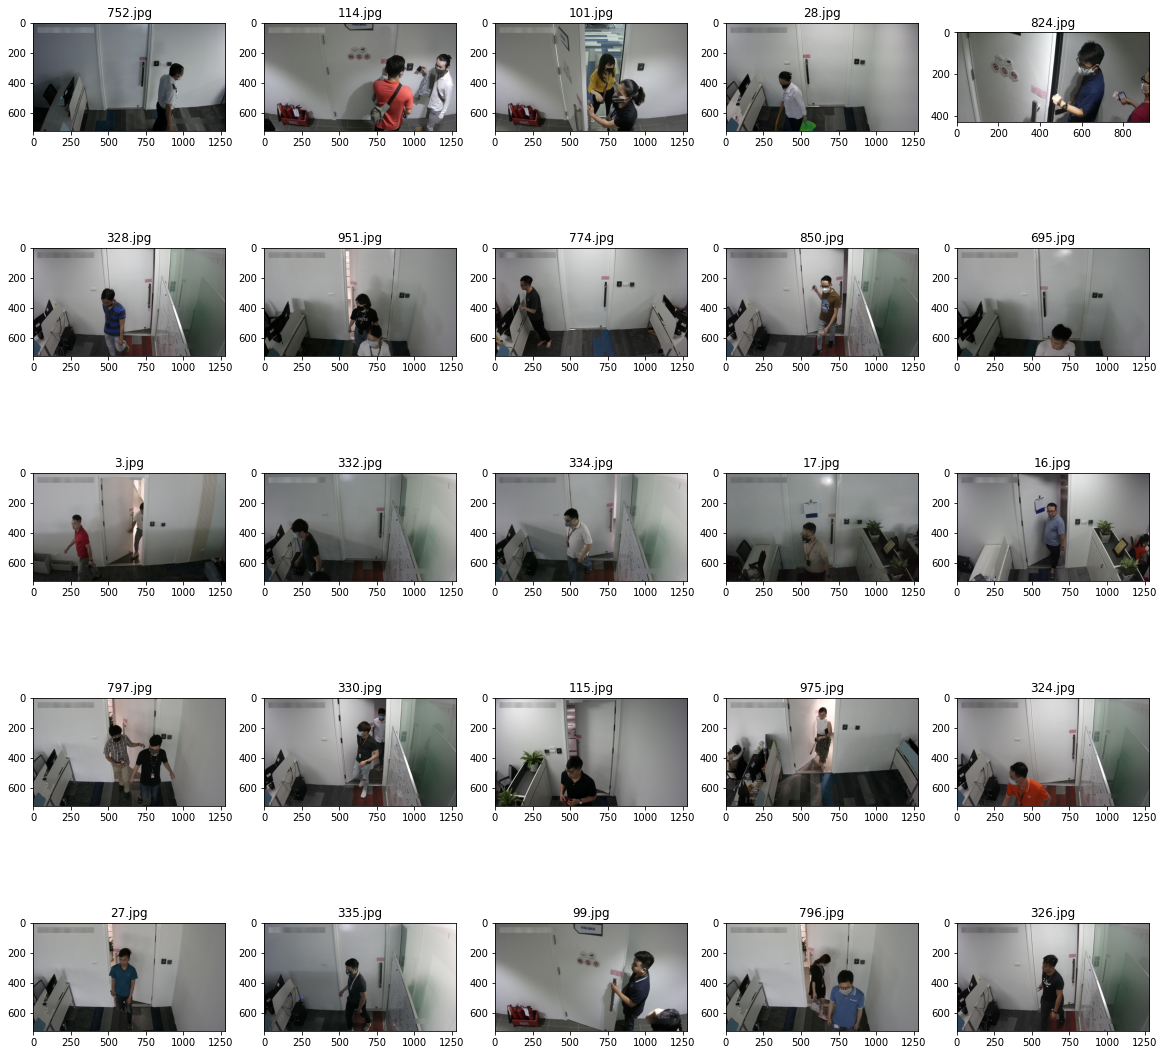

In [ ]:
# GROUP 0 (cluster 0)
def plot25IMG(groupIdx):
  fig, ax = plt.subplots(5,5, figsize=(20, 20))
  ax = ax.flatten() # 25 images are selected randomly to plot out.
  a = 0
  grp = idxs[groupIdx]
  items = np.random.choice(grp, size=len(ax), replace=False)

  # for i in random.choices(range(len(idx_gr_0)), k=25):
  for item in items:
    img  = cv2.imread(images_path[item])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    title = images_path[item].split("/")[-1]
    ax[a].set_title(title)
    ax[a].imshow(img)
    a += 1
  plt.show()
plot25IMG(0)

### Group 1

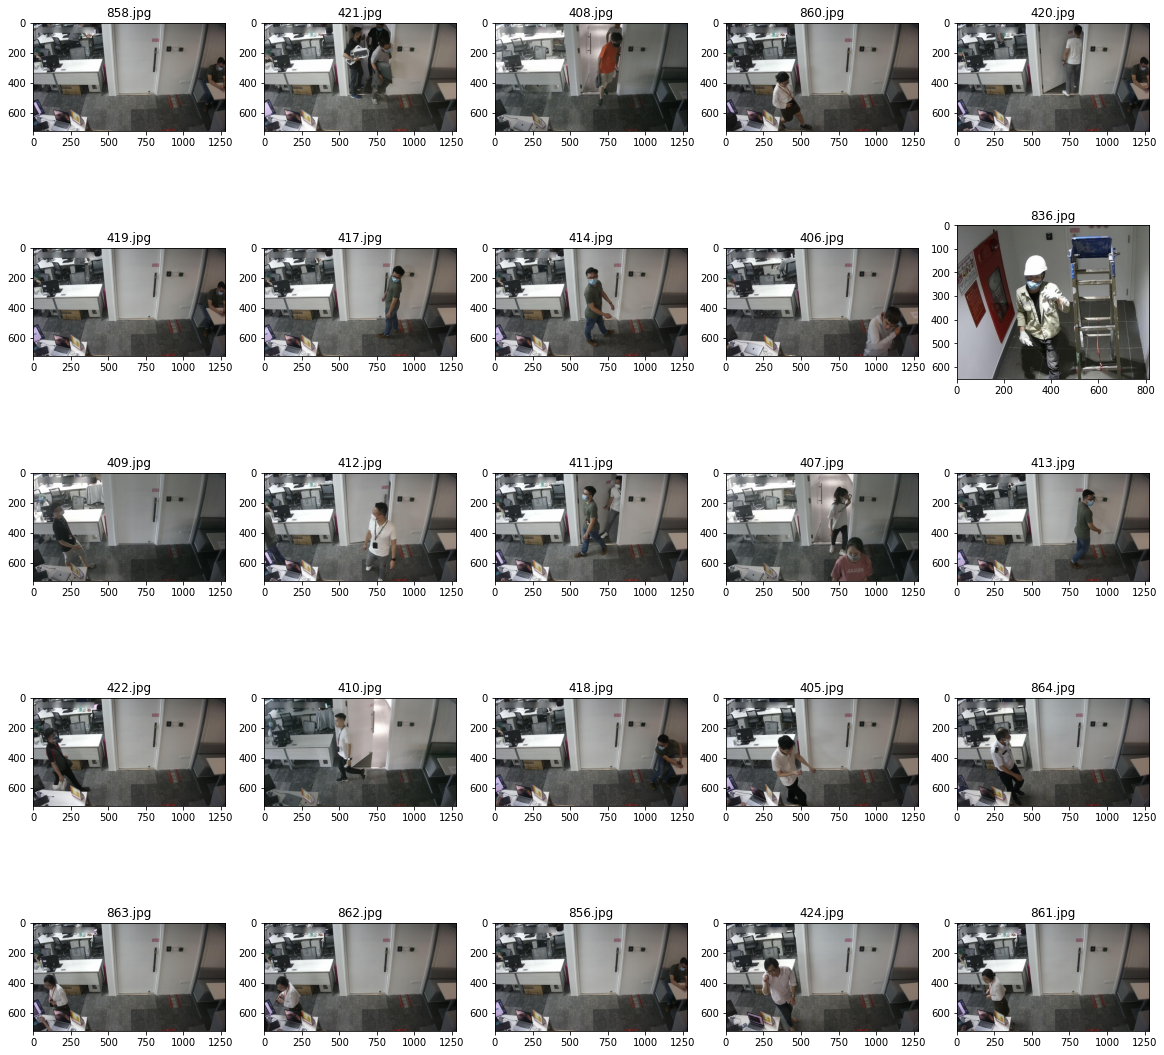

In [ ]:
plot25IMG(1)

### Group 2

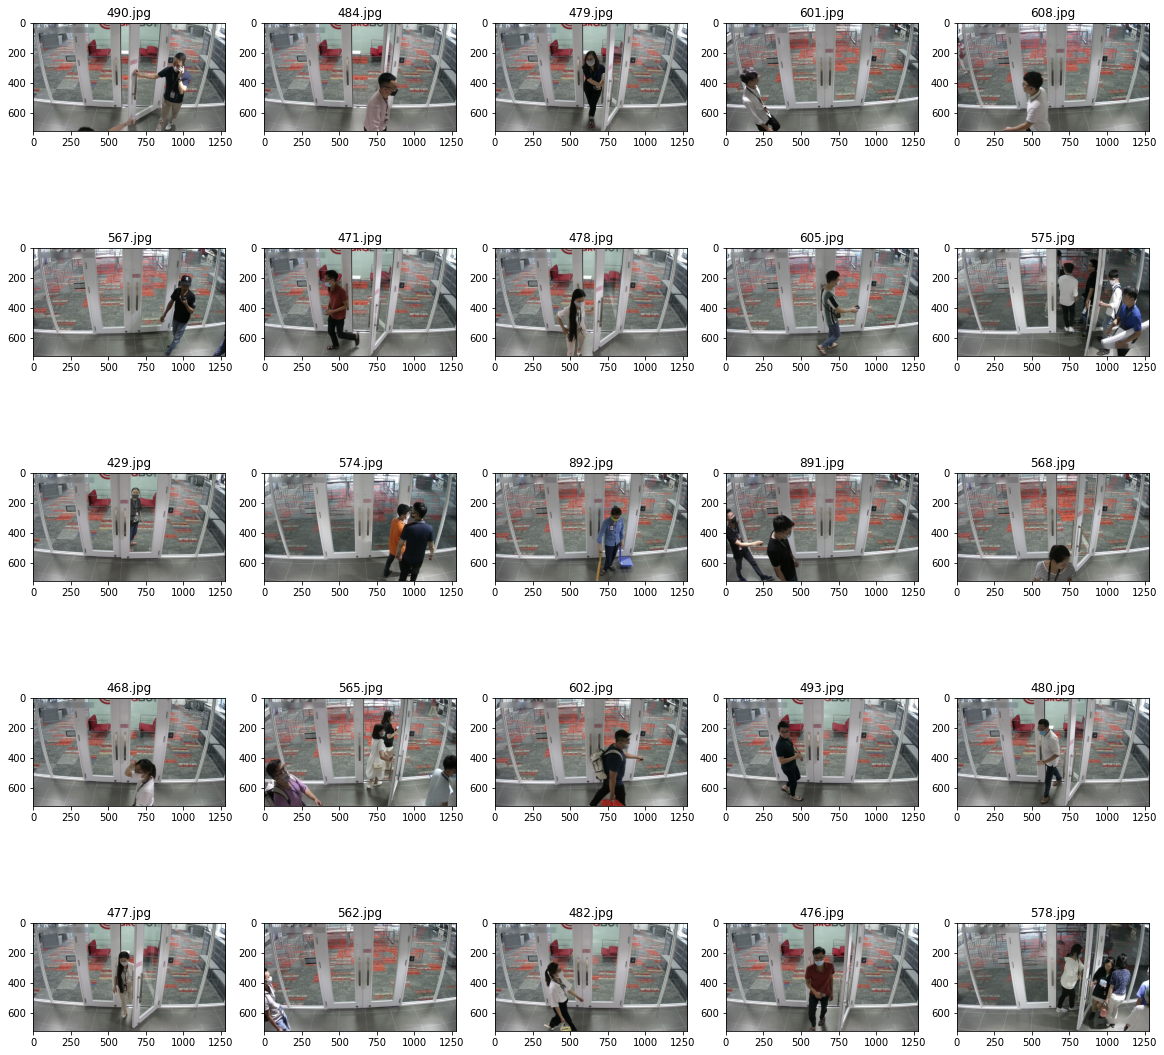

In [ ]:
plot25IMG(2)

### Group 3

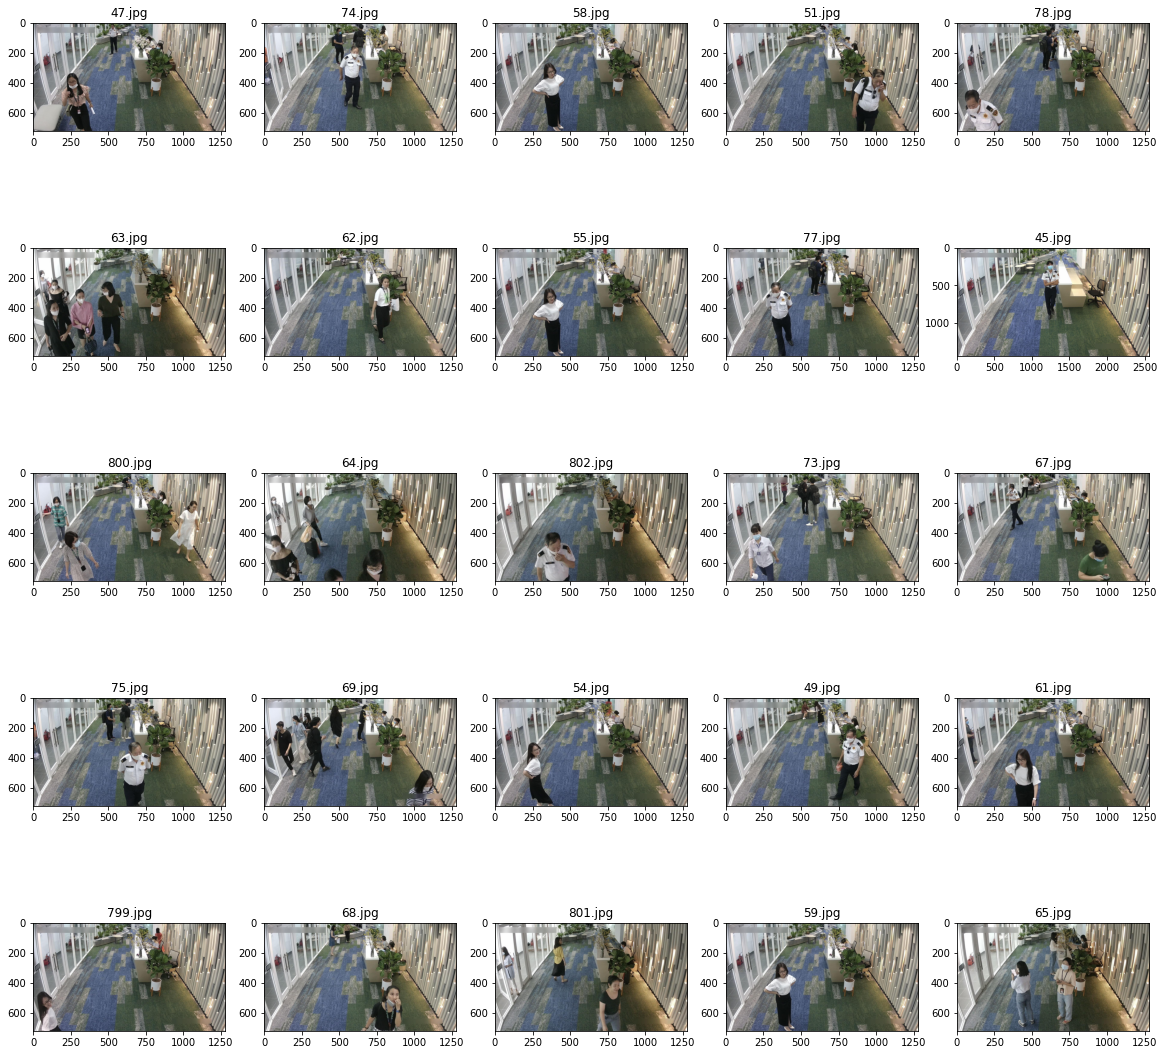

In [ ]:
plot25IMG(3)

### Group 4

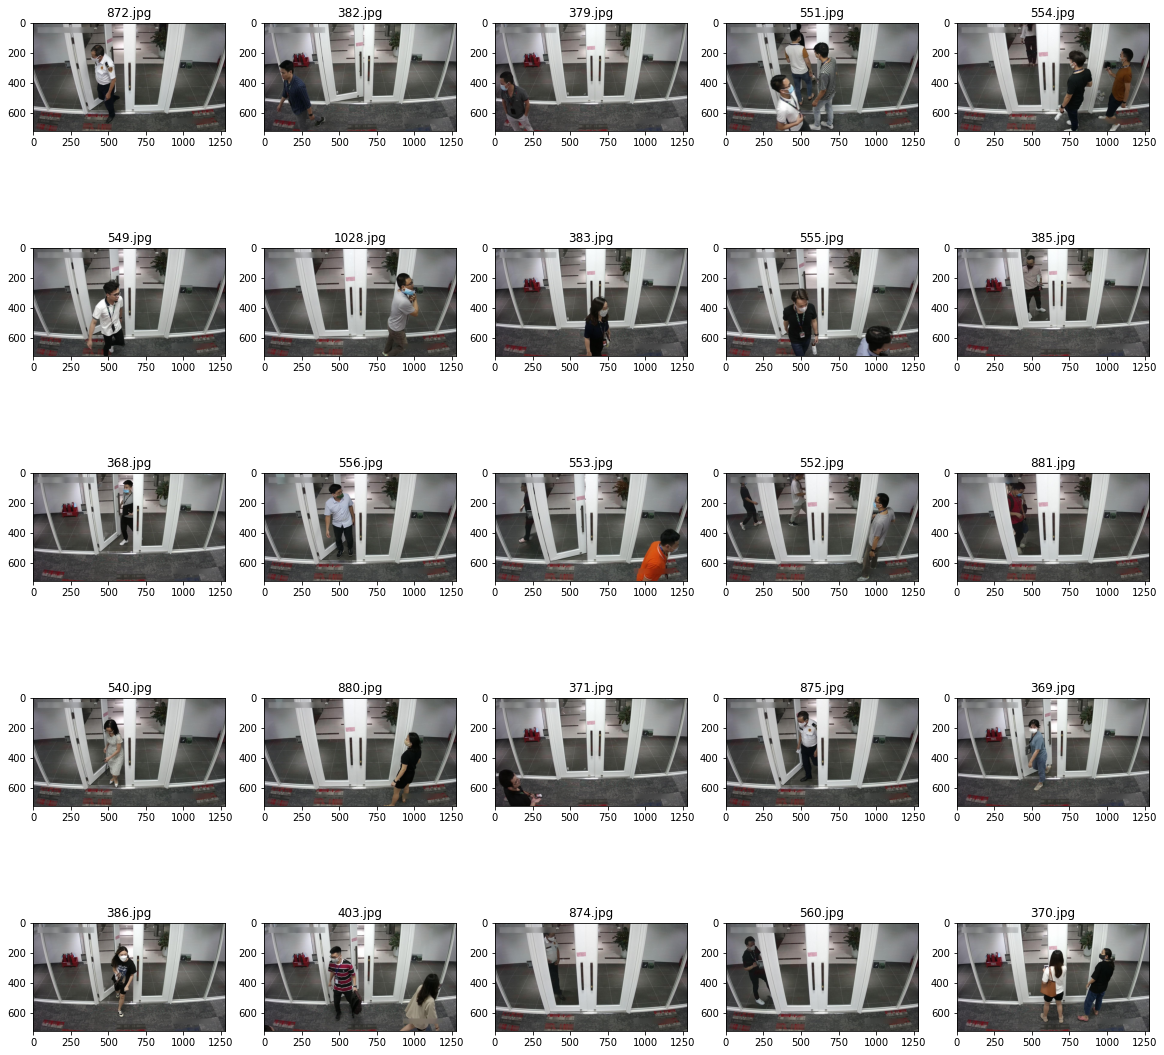

In [ ]:
plot25IMG(4)

### Group 5

In [ ]:
plot25IMG(5)

## Construct the valadition dataset
- Using KNN to separate the dataset (old train + old val) into 20 groups based on their own similar features resulted from the VGG16 model
- Choose randomly 5 images in each group & combine them all together to construct a validation dataset

In [ ]:
import random
from PIL import Image

# Random choose 5 images from each group --> Total 100 images
# rand_0 = random.choices(idx_gr_0, k=5)
# rand_1 = random.choices(idx_gr_1, k=5)
# rand_2 = random.choices(idx_gr_2, k=5)
# rand_3 = random.choices(idx_gr_3, k=5)
# rand_4 = random.choices(idx_gr_4, k=5)
# rand_5 = random.choices(idx_gr_5, k=5)
# rand_6 = random.choices(idx_gr_6, k=5)
# rand_7 = random.choices(idx_gr_7, k=5)
# rand_8 = random.choices(idx_gr_8, k=5)
# rand_9 = random.choices(idx_gr_9, k=5)

# rand_10 = random.choices(idx_gr_10, k=5)
# rand_11 = random.choices(idx_gr_11, k=5)
# rand_12 = random.choices(idx_gr_12, k=5)
# rand_13 = random.choices(idx_gr_13, k=5)
# rand_14 = random.choices(idx_gr_14, k=5)
# rand_15 = random.choices(idx_gr_15, k=5)
# rand_16 = random.choices(idx_gr_16, k=5)
# rand_17 = random.choices(idx_gr_17, k=5)
# rand_18 = random.choices(idx_gr_18, k=5)
# rand_19 = random.choices(idx_gr_19, k=5)

In [ ]:
# COPY images from train_val & save them to val folder
# DONE
def load_copy_images(start_folder, end_folder, indx_lst):
  """Load all the .jpeg images from the start_folder & save them into end_folder"""
  # List of chosen image's id
  chosen_id = list()
  for indx in indx_lst:
    temp = images_path[indx]
    chosen_id.append(int(temp.strip().split('/')[-1][:-4]))

  # make sure there's a slash to the folder path 
  start_folder += "" if start_folder[-1] == "/" else "/"
  # get all text files
  img_files = glob.glob(start_folder + "*.jpg")

  for img in img_files:
    # Extract the name (id) of images
    img_id = img.strip().split('/')[-1][:-4]

    if int(img_id) in chosen_id:
      # Load the images from start_folder (dataset)
      img_arr = cv2.imread(img, cv2.IMREAD_COLOR)
      assert img_arr is not None, 'Image Not Found '
      img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)  # BGR to RGB

      # Save images to end_folder (dataset_aug)
      im = Image.fromarray(img_arr, "RGB")
      im.save(f"{end_folder}/{img_id}.jpg")
      # print(f"{end_folder}/{img_id}.jpg")
    else:
      continue


# DONE
def load_copy_anno_txt(start_folder, end_folder, indx_lst):
  """Load & copy annotation txt files from start_folder (dataset) to end_folder (dataset_aug)"""
  # List of chosen image's id
  chosen_id = list()
  for indx in indx_lst:
    temp = images_path[indx]
    chosen_id.append(int(temp.strip().split('/')[-1][:-4]))

  # make sure there's a slash to the folder path 
  start_folder += "" if start_folder[-1] == "/" else "/"
  # get all text files
  txt_files = glob.glob(start_folder + "*.txt")

  for txt_f in txt_files:
    # Extract the name (id) of txt annotation file
    txt_id = txt_f.strip().split('/')[-1][:-4]

    if int(txt_id) in chosen_id:
      with open(txt_f, 'r') as fd:
        lines = fd.readlines()
        # Save the string to txt file in end_folder (dataset_aug)
        txt_file = open(f'{end_folder}/{txt_id}.txt', 'w')
        for line in lines:
          txt_file.write(line)  # Write each txt line into a new file
        txt_file.close()
    else:
      continue

In [ ]:
# Copy the images from each group to val folder
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_0)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_1)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_2)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_3)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_4)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_5)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_6)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_7)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_8)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_9)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_10)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_11)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_12)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_13)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_14)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_15)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_16)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_17)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_18)
# load_copy_images("./dataset_origin/images/train_val", "./dataset_origin/images/val", rand_19)

# Copy the annotation from each group to val folder
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_0)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_1)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_2)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_3)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_4)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_5)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_6)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_7)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_8)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_9)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_10)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_11)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_12)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_13)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_14)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_15)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_16)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_17)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_18)
# load_copy_anno_txt("./dataset_origin/labels/train_val", "./dataset_origin/labels/val", rand_19)

In [ ]:
# DELETE all the added images & annotation files from train_val folder
def delete_files(folder_path, indx_lst):
  """Delete all img_{}.jpeg or img_{}.txt files from a given folder base on the name's pattern"""
  a = 0
  # List of chosen image's id
  chosen_id = list()
  for indx in indx_lst:
    temp = images_path[indx]
    chosen_id.append(int(temp.strip().split('/')[-1][:-4]))

  # # (OPTION 1) DELETE IMAGE
  # # make sure there's a slash to the folder path 
  # folder_path += "" if folder_path[-1] == "/" else "/"
  # # get all text files
  # img_files = glob.glob(folder_path + "*.jpg")

  # for img_f in img_files:
  #   # Extract the name (id) of txt annotation file
  #   img_f = img_f.strip().split('/')[-1][:-4]

  #   if int(img_f) in chosen_id:
  #     # Remove file from folder
  #     os.remove(f"{folder_path}/{img_f}.jpg")
  #     # print(f"{folder_path}{img_f}.jpg")


  # (OPTION 2) DELETE TXT FILE
  # make sure there's a slash to the folder path 
  folder_path += "" if folder_path[-1] == "/" else "/"
  # get all text files
  txt_files = glob.glob(folder_path + "*.txt")

  for txt_f in txt_files:
    # Extract the name (id) of txt annotation file
    txt_f = txt_f.strip().split('/')[-1][:-4]

    if int(txt_f) in chosen_id:
      a += 1
      # Remove file from folder
      # os.remove(f"{folder_path}{txt_f}.txt")
      print(f"{folder_path}{txt_f}.txt")

In [ ]:
# Delete all image files from train_val folder
# delete_files("./dataset_origin/images/train_val", rand_0)
# delete_files("./dataset_origin/images/train_val", rand_1)
# delete_files("./dataset_origin/images/train_val", rand_2)
# delete_files("./dataset_origin/images/train_val", rand_3)
# delete_files("./dataset_origin/images/train_val", rand_4)
# delete_files("./dataset_origin/images/train_val", rand_5)
# delete_files("./dataset_origin/images/train_val", rand_6)
# delete_files("./dataset_origin/images/train_val", rand_7)
# delete_files("./dataset_origin/images/train_val", rand_8)
# delete_files("./dataset_origin/images/train_val", rand_9)
# delete_files("./dataset_origin/images/train_val", rand_10)
# delete_files("./dataset_origin/images/train_val", rand_11)
# delete_files("./dataset_origin/images/train_val", rand_12)
# delete_files("./dataset_origin/images/train_val", rand_13)
# delete_files("./dataset_origin/images/train_val", rand_14)
# delete_files("./dataset_origin/images/train_val", rand_15)
# delete_files("./dataset_origin/images/train_val", rand_16)
# delete_files("./dataset_origin/images/train_val", rand_17)
# delete_files("./dataset_origin/images/train_val", rand_18)
# delete_files("./dataset_origin/images/train_val", rand_19)

# Delete all annotation files from train_val folder
# delete_files("./dataset_origin/labels/train_val", rand_0)
# delete_files("./dataset_origin/labels/train_val", rand_1)
# delete_files("./dataset_origin/labels/train_val", rand_2)
# delete_files("./dataset_origin/labels/train_val", rand_3)
# delete_files("./dataset_origin/labels/train_val", rand_4)
# delete_files("./dataset_origin/labels/train_val", rand_5)
# delete_files("./dataset_origin/labels/train_val", rand_6)
# delete_files("./dataset_origin/labels/train_val", rand_7)
# delete_files("./dataset_origin/labels/train_val", rand_8)
# delete_files("./dataset_origin/labels/train_val", rand_9)
# delete_files("./dataset_origin/labels/train_val", rand_10)
# delete_files("./dataset_origin/labels/train_val", rand_11)
# delete_files("./dataset_origin/labels/train_val", rand_12)
# delete_files("./dataset_origin/labels/train_val", rand_13)
# delete_files("./dataset_origin/labels/train_val", rand_14)
# delete_files("./dataset_origin/labels/train_val", rand_15)
# delete_files("./dataset_origin/labels/train_val", rand_16)
# delete_files("./dataset_origin/labels/train_val", rand_17)
# delete_files("./dataset_origin/labels/train_val", rand_18)
# delete_files("./dataset_origin/labels/train_val", rand_19)

In [ ]:
# DONE
def load_copy_images_only(start_folder, end_folder):
  """Load all the .jpg images from the start_folder & save them into end_folder"""

  # make sure there's a slash to the folder path 
  start_folder += "" if start_folder[-1] == "/" else "/"
  # get all text files
  img_files = glob.glob(start_folder + "*.jpg")

  for img in img_files:
    # Load the images from start_folder (dataset)
    img_arr = cv2.imread(img, cv2.IMREAD_COLOR)
    assert img_arr is not None, 'Image Not Found ' + imgpath
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)  # BGR to RGB

    # Extract the name (id) of images
    img_id = img.strip().split('/')[-1][:-4]

    # Save images to end_folder (dataset_aug)
    im = Image.fromarray(img_arr, "RGB")
    im.save(f"{end_folder}/{img_id}.jpg")

# DONE
def load_copy_anno_txt_only(start_folder, end_folder):
  """Load & copy annotation txt files from start_folder (dataset) to end_folder (dataset_aug)"""
  # make sure there's a slash to the folder path 
  start_folder += "" if start_folder[-1] == "/" else "/"
  # get all text files
  txt_files = glob.glob(start_folder + "*.txt")
  for txt_f in txt_files:
    # Extract the name (id) of txt annotation file
    txt_id = txt_f.strip().split('/')[-1][:-4]

    with open(txt_f, 'r') as fd:
      lines = fd.readlines()
      # Save the string to txt file in end_folder (dataset_aug)
      txt_file = open(f'{end_folder}/{txt_id}.txt', 'w')
      for line in lines:
        txt_file.write(line)  # Write each txt line into a new file
      txt_file.close()

In [ ]:
# load_copy_images_only('./dataset_origin/images/public_test', './dataset_origin/images/val')
# load_copy_anno_txt_only('./dataset_origin/labels/public_test', './dataset_origin/labels/val')
# load_copy_images_only('./dataset/images/val', './dataset_aug/images/val')
# load_copy_anno_txt_only('./dataset/labels/val', './dataset_aug/labels/val')
# load_copy_images_only('./dataset/images/train', './dataset_aug/images/train')
# load_copy_anno_txt_only('./dataset/labels/train', './dataset_aug/labels/train')

## Metadata for KNN

In [ ]:
group_0 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_0]
group_0['knn_group'] = "group_0"
group_1 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_1]
group_1['knn_group'] = "group_1"
group_2 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_2]
group_2['knn_group'] = "group_2"
group_3 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_3]
group_3['knn_group'] = "group_3"
group_4 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_4]
group_4['knn_group'] = "group_4"
group_5 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_5]
group_5['knn_group'] = "group_5"
group_6 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_6]
group_6['knn_group'] = "group_6"
group_7 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_7]
group_7['knn_group'] = "group_7"
group_8 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_8]
group_8['knn_group'] = "group_8"
group_9 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_9]
group_9['knn_group'] = "group_9"
group_10 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_10]
group_10['knn_group'] = "group_10"
group_11 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_11]
group_11['knn_group'] = "group_11"
group_12 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_12]
group_12['knn_group'] = "group_12"
group_13 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_13]
group_13['knn_group'] = "group_13"
group_14 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_14]
group_14['knn_group'] = "group_14"
group_15 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_15]
group_15['knn_group'] = "group_15"
group_16 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_16]
group_16['knn_group'] = "group_16"
group_17 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_17]
group_17['knn_group'] = "group_17"
group_18 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_18]
group_18['knn_group'] = "group_18"
group_19 = pd.DataFrame(images_path, columns=["image_path"]).iloc[idx_gr_19]
group_19['knn_group'] = "group_19"

In [ ]:
knn_group = pd.concat((group_0, group_1, group_2, group_3, group_4, group_5, group_6, group_7, group_8, group_9, group_10,
                      group_11, group_12, group_13, group_14, group_15, group_16, group_17, group_18, group_19), axis=0).reset_index(drop=True)
knn_group

# knn_group.to_csv("./dataset_origin/KNN_group/knn_group_csv.csv", index=False)

image_path knn_group
0      dataset_origin/images/train_val/1.jpg   group_0
1     dataset_origin/images/train_val/10.jpg   group_0
2    dataset_origin/images/train_val/102.jpg   group_0
3    dataset_origin/images/train_val/104.jpg   group_0
4    dataset_origin/images/train_val/112.jpg   group_0
..                                       ...       ...
895  dataset_origin/images/train_val/946.jpg  group_19
896  dataset_origin/images/train_val/961.jpg  group_19
897  dataset_origin/images/train_val/962.jpg  group_19
898  dataset_origin/images/train_val/975.jpg  group_19
899  dataset_origin/images/train_val/976.jpg  group_19

[900 rows x 2 columns]